Оглавление
Шаг 1.
Шаг 2.
Шаг 3. 
Шаг 4.
Шаг 5. 
Общий вывод

Шаг 1.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Судя по данным, мы обладаем данными по Европе, Северной Америке и Японии. Странно, что колонка 'Critic_Score' сохранена в данных типа float. Их придется переделать. Кроме того, все колонки написаны с загланной буквы. Их можно привести к нижнему регистру

Шаг 2.

In [4]:
data.set_axis(data.columns.str.lower(), axis='columns', inplace=True)

In [5]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Изначально данные в колонке 'User_Score' были в формате object. Поскольку данные состояли преимущественно из цифр, я в целях дальнейшей корректной работы над проектом решил заменить их на объекты типа 'float64'. Приминение метода to_numeric c аргументомerrors='coerce' позволило заменить строку 'tbd' на 'Nan'.  

In [6]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Строка 'tbd' исчезла из колонки

In [7]:
data['year_of_release'].fillna(0)

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

In [8]:
data['rating'] = data['rating'].fillna('undefined')

Я решил заменить пропуски на на нули, поскольку в этом столбце пропусков было не так много, а значит их отсутствие не повлияет на дальнейший анализ. В колонке 'user_score' и 'critic_score' было достаточно много пропусков, поэтому их удаление привело бы к искажению данных. В столбце 'raiting' я заменил пропуски на undefined. Возможно, пропуски появились, поскольку игроки и критики просто не успели поставить оценки.  

In [9]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [10]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Наибольшая вероятность найти дубликаты была в колонках 'platform' и 'genre', однако методом .value_counts() их обнаружить не удалось. 

В данной части задания я удалил пропуски так, где это возможно было сделать. Заменил 'Tld' на 'Nan'. Поскольку дубликатов не было, я оставил все данные в первоначальном состоянии

In [11]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

Шаг 3.

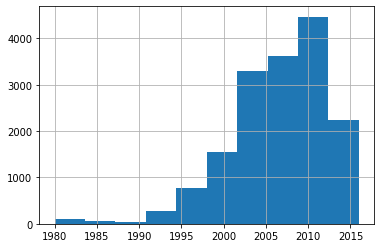

In [12]:
data['year_of_release'].hist();

Больше всего игр было выпущено в промежутке между 2005 и 2010 годами. 

In [13]:
data = data.query('year_of_release > 1992')

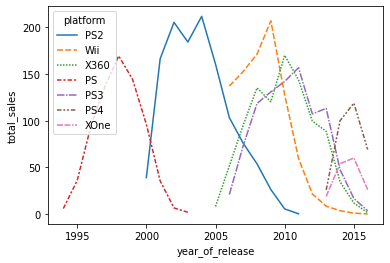

In [14]:
platform_total_sales = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False) 
platform_total_sales_top = platform_total_sales.query('platform == "XOne" or platform == "PS3" or platform == "PS4" or platform == "X360" or platform == "PS" or platform == "PS2" or platform == "Wii"')
sns.lineplot(data=platform_total_sales_top, x='year_of_release', y='total_sales', hue='platform', style='platform')
sns.set(rc={'figure.figsize':(12,6)})


Привет! Спросил у препода, вроде тут распределение по суммарным продажам и показано

Период использования платформ составляет примерно 8-10 лет. При этом пик продаж на этих платформах приходился на з-ий и 4-ый годы с моменты их выхода. 

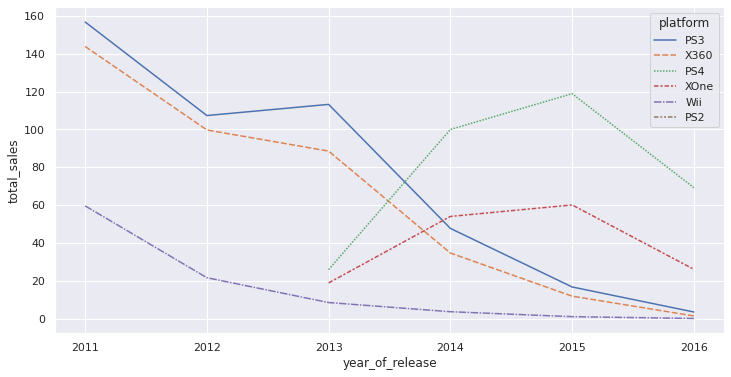

In [15]:
platform_total_sales_actual = platform_total_sales_top.query('year_of_release > 2010')
sns.lineplot(data=platform_total_sales_actual, x='year_of_release', y='total_sales', hue='platform', style='platform');

Я решил выбрать актуальные период с 2010 г., поскольку на него приходится момент спада продаж на старых платформах (PS3, X360,Wii) и появление новых платформ с 2013 г. (PS4, XOne). Судя по данным, к 2018-2020 г. продажи на этих платформах достигнут своего минимума. PS4 по-прежнему остается наиболее прибыльной платформой, хотя продажи на нем постепенно снижаются. Второй по прибыльности, но заметно менее популярной является платформа XOne. 

(0.0, 2.0)

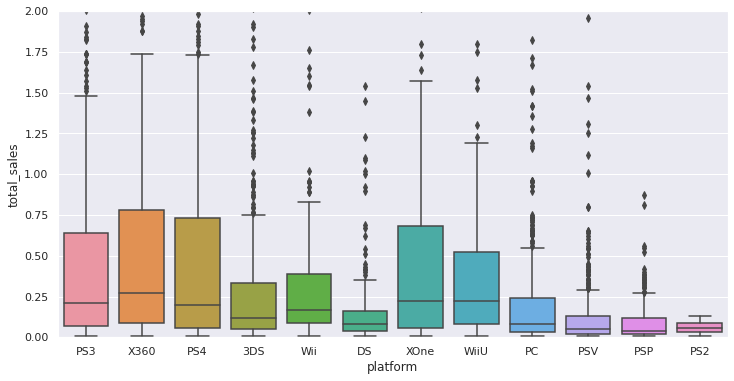

In [16]:
data_filtred = data.query('year_of_release > 2010')
sns.boxplot(data = data_filtred, y = 'total_sales', x='platform'); 
plt.ylim(0, 2)


В среднем с 2010 г. больше всего было продаж на платформах PS3, X360, PS4, XOne. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.4327589578997135

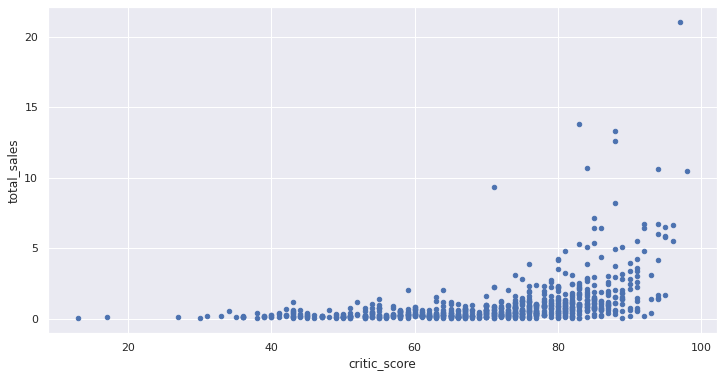

In [17]:
PS3 = data.query('platform == "PS3"')
PS3.plot(x='critic_score', y='total_sales', kind='scatter');
PS3['total_sales'].corr(PS3['critic_score'])


Благодаря графику можно увидеть, что высокая оценка критиков относительно слабо влияет на продажи игр с платформы PS3. Об этом же говорит и корреляция 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.12841562938563006

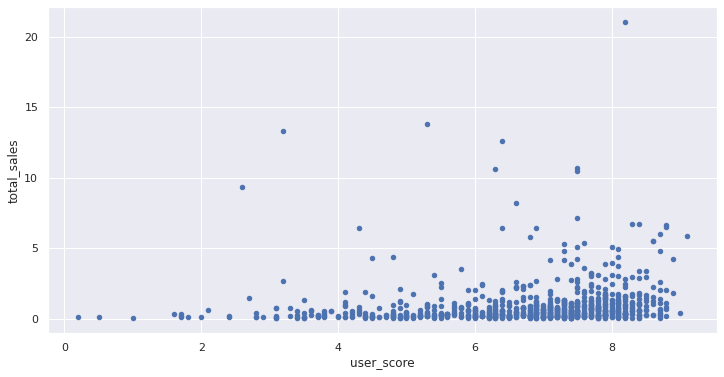

In [18]:
PS3 = data.query('platform == "PS3"')
PS3.plot(x='user_score', y='total_sales', kind='scatter');
PS3['total_sales'].corr(PS3['user_score'])


Как видно на графике, оценка пользователей слабо влияла на продажи игр с платформы PS3. Об этом же говорит корреляция  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.08873442613631503

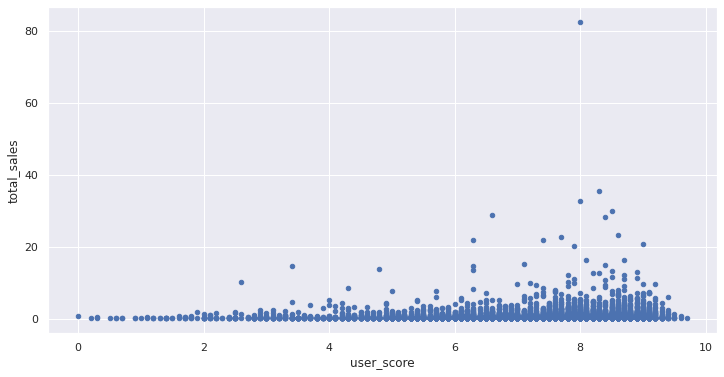

In [19]:
another_platforms = data.query('platform != "PS3"')
another_platforms.plot(x='user_score', y='total_sales', kind='scatter');
another_platforms['total_sales'].corr(another_platforms['user_score'])

В целом оценки пользователей слабо влияют на продажи игр на остальных платформах. Это видно и на графике, и на корреляции 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.2248106510799799

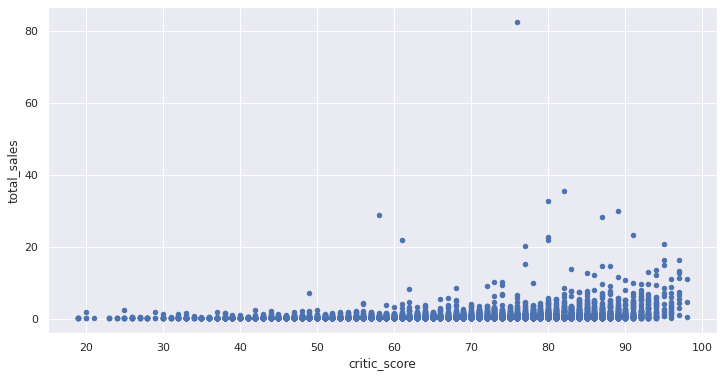

In [20]:
another_platforms.plot(x='critic_score', y='total_sales', kind='scatter');
another_platforms['total_sales'].corr(another_platforms['critic_score'])

Как видно из графика, оценки критиков слабо влияют на продажи игр в целом.

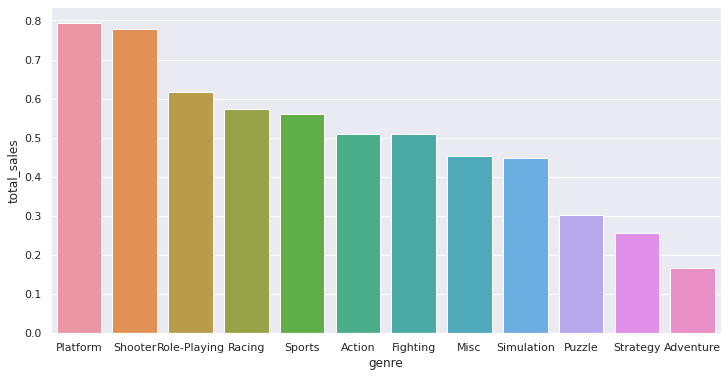

In [21]:
profit_genre = data.pivot_table(index=['genre'], values=['total_sales']).sort_values(by='total_sales', ascending=False) 
profit_genre.reset_index()
sns.barplot (x = profit_genre.index, y = profit_genre ['total_sales']);

Как видно из графика, наиболее прибыльными жанрами игр являются платформер, шутер. Жанр стратегии и приключений являются наименее прибыльными

Шаг 4. Портрет пользователя каждого региона

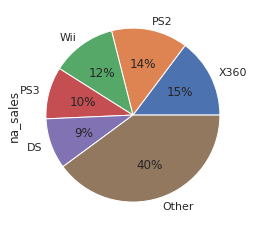

In [22]:
na_sales_data = data.pivot_table(index=['platform'], values=['na_sales'], aggfunc= 'sum').sort_values(by='na_sales', ascending=False).head()
top_na_sales_data = data.pivot_table(index=['platform'], values=['na_sales'], aggfunc= 'sum').sort_values(by='na_sales', ascending=False)
na_sales_data.loc['Other', 'na_sales'] = top_na_sales_data.iloc[5:].sum()[0]
na_sales_data.plot(kind = 'pie', y = 'na_sales', legend = False, figsize = (4,4), autopct = '%.0f%%' );

В Северной Америке самой популярной платформой являетя X360, на втором месте PS2. На популярные платформы приходится порядка 60% всего рынка. 

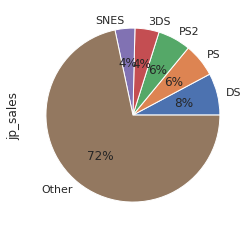

In [23]:
jp_sales_data = data.pivot_table(index=['platform'], values=['jp_sales'], aggfunc= 'sum').sort_values(by='jp_sales', ascending=False).head()
top_jp_sales_data = data.pivot_table(index=['platform'], values=['jp_sales'], aggfunc= 'sum').sort_values(by='jp_sales', ascending=False)
jp_sales_data.loc['Other', 'jp_sales'] = top_na_sales_data.iloc[5:].sum()[0]
jp_sales_data.plot(kind = 'pie', y = 'jp_sales', legend = False, figsize = (4,4), autopct = '%.0f%%' );

В Японии наиболее популярной платформой у пользователей является DS. На втором месте находятся PS2 и PS.

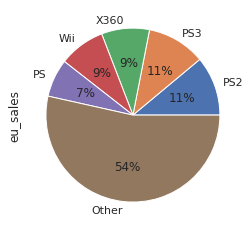

In [24]:
eu_sales_data = data.pivot_table(index=['platform'], values=['eu_sales'], aggfunc= 'sum').sort_values(by='eu_sales', ascending=False).head()
top_eu_sales_data = data.pivot_table(index=['platform'], values=['eu_sales'], aggfunc= 'sum').sort_values(by='eu_sales', ascending=False)
eu_sales_data.loc['Other', 'eu_sales'] = top_na_sales_data.iloc[5:].sum()[0]
eu_sales_data.plot(kind = 'pie', y = 'eu_sales', legend = False, figsize = (4,4), autopct = '%.0f%%' );

В Европе больше всего люди играют на PS3 и PS2. В Старом Свете меньше увлекаются Wii и 360, чем в Северной Америке

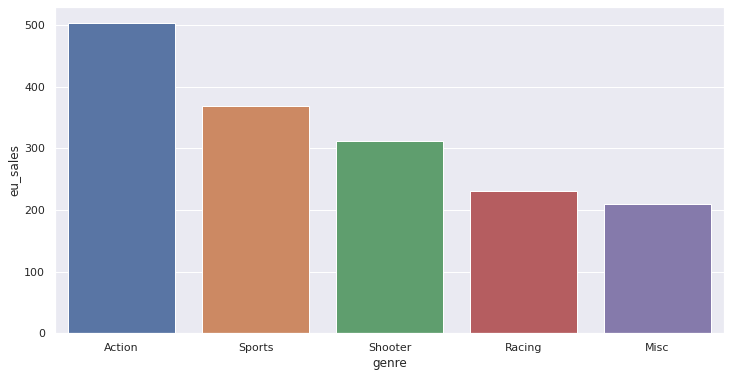

In [25]:
eu_genre = data.pivot_table(index=['genre'], values=['eu_sales'], aggfunc= 'sum').sort_values(by='eu_sales', ascending=False).head()
eu_genre.reset_index()
sns.barplot (x = eu_genre.index, y = eu_genre ['eu_sales']);


В Европе людям больше всего нравится играть в игры жанра Action. Спортивные симпуляторы занимают второе место

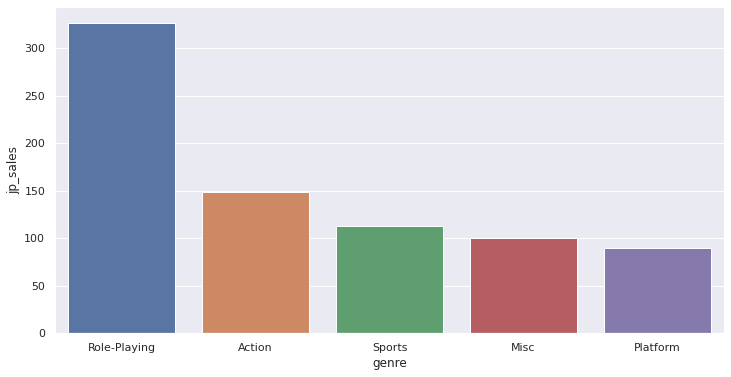

In [26]:
jp_genre = data.pivot_table(index=['genre'], values=['jp_sales'], aggfunc= 'sum').sort_values(by='jp_sales', ascending=False).head()
jp_genre.reset_index()
sns.barplot (x = jp_genre.index, y = jp_genre ['jp_sales']);

В Японии огромной популярностью пользуются ролевые игры. Их покупаются почти в два раза больше, чем игры жанра Action и спортивные симуляторы

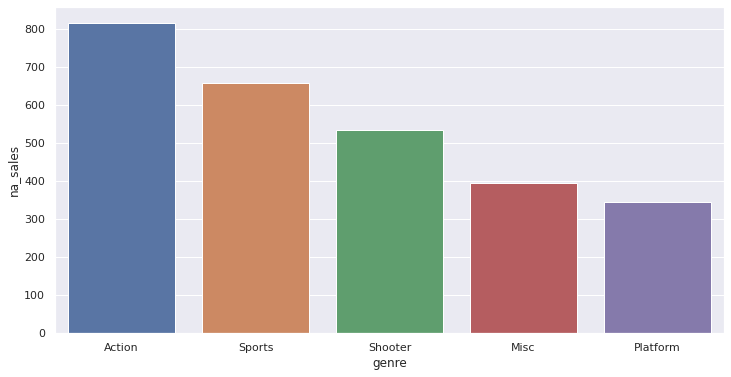

In [27]:
na_genre = data.pivot_table(index=['genre'], values=['na_sales'], aggfunc= 'sum').sort_values(by='na_sales', ascending=False).head()
na_genre.reset_index()
t = sns.barplot (x = na_genre.index, y = na_genre ['na_sales']);

В Северной Америке наиболее популярными играми как и в Европе являются игры в жанре Action и спортивные симуляторы.

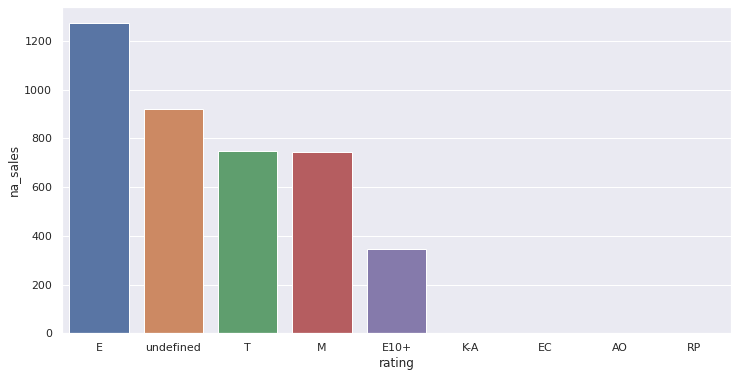

In [28]:
rating_region_na = data.pivot_table(index=['rating'], values=['na_sales'], aggfunc= 'sum').sort_values(by='na_sales', ascending=False)
rating_region_na.reset_index()
sns.barplot (x = rating_region_na.index, y = rating_region_na ['na_sales']);

Как видно из графика, в Северной Америке игры с рейтингом E пользуются огромной популярностью. Игры с рейтингом T, M также достаточно популярны. Игры с рейтингом E10+ пользуются популярностью почти в 4 раза меньше, чем игры с рейтингом E. Остальные рейтинги, судя по графику, вообще никак не влияют на продажи 

Шаг 5. 

В качестве нулевой гипотезы я выбрал утверждение, что среднее пользовательских рейтингов на платформах XOne и PC одинаковое. 
Нулевая гипотеза не была опровергнута

In [29]:
xone = data.loc[data['platform'] == 'XOne']['user_score']
pc = data.loc[data['platform'] == 'PC']['user_score']
# results - вызов метода для проверки гипотез
results = st.ttest_ind(xone, pc, equal_var=False, nan_policy = 'omit')
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу ')

3.442937492775816e-06
Отвергаем нулевую гипотезу


В качестве нулевой гипотезы я выбрал утверждение, что  среднее пользовательских  рейтингов жанров Action и Sports разные. 
Нулевая гипотезы была отвергнута

In [30]:
action = data.loc[data['genre'] == 'Action']['user_score']
sports = data.loc[data['genre'] == 'Sports']['user_score']
# results - вызов метода для проверки гипотез
results = st.ttest_ind(action, sports, equal_var=False, nan_policy = 'omit')
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу ')

0.07370217419278532
Не получилось отвергнуть нулевую гипотезу 


Общий вывод

1. Я заменил в колонке user_scores данные с типа objekt на float, поскольку 
2. Я заменил все пропуски на нули, поскольку это незначительно влияло на исследование данных  
3. Построение гистограмы позволило увидеть, что больше всего игр продавалось в период с 2005 по 2010 гг. 
4. Средний срок продаж на платформах длиться по 8-10 лет 
5. В 2017 г. наиболее прибыльной скорее всего будет платформа PS3, однако продажи игр на нее падают уже 2016 г. 
6. В среднем с 2010 г. больше всего было продаж на платформах PS3, X360, PS4, XOne. 
7. Оценки критиков и пользователей незначительно влияют на продажи игр
8. Наиболее популярными жанрами оказались платформеры и шутеры 
9. В Северной Америке и Европе наиболее популярными платформами были PS3, PS2 и X360. В Японии, напротив, популярностью пользовалась DS
10. В Северной Америке и Европе наиболее популярными жанрами являются Action и спортивные симуляторы. В Японии самыми популярными являются ролевые игры 
11. Рейтинги с индексом E пользуются наибольшей популярностью у пользователей в Северной Америке. 
12. Средний рейтинг игр на платформе XOne и PC примерно одиковый
13. Средний рейтинг у игр в жанре Action и Sports разный
14. Я думаю, что маркетологам стоит думать о рекламе грядущих платформ, потому что популярность нынешних будет только падать

